In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df = pd.read_excel('prepdata.xlsx',index_col=0,parse_dates=True)
df.dropna(axis='columns',inplace=True)
df.head()

,CO1 Comdty,CO2 Comdty,CO3 Comdty,CO4 Comdty,PVMMDS12 Index,PVMMDS23 Index,PVMMD2M3 Index,PVMMD3M4 Index,PVMMDBSP Index,DKI1 Comdty,...,CFCDQORS Index,CFCDPORL Index,CFCDPORS Index,CFCDQPTS Index,CFCDQSWD Index,CFCDPMMD Index,OISTCRDE Index,GBPUSD Curncy,EURUSD Curncy,JPYUSD Curncy
2018-01-02,66.57,66.13,65.79,65.51,0.25,0.25,0.25,0.25,3.08,64.01,...,55237,36753,39940,70,388157,47687,2480,1.3590,1.2059,0.008906
2018-01-03,67.84,67.29,66.90,66.57,0.26,0.26,0.26,0.26,3.36,65.24,...,55237,36753,39940,70,388157,47687,2526,1.3516,1.2015,0.008888
2018-01-04,68.07,67.51,67.11,66.77,0.29,0.29,0.29,0.29,3.34,65.30,...,55237,36753,39940,70,388157,47687,2539,1.3551,1.2068,0.008869
2018-01-05,67.62,67.10,66.73,66.41,0.28,0.26,0.28,0.26,3.29,64.93,...,55237,36753,39940,70,388157,47687,2539,1.3571,1.2029,0.008844
2018-01-08,67.78,67.31,66.95,66.64,0.26,0.24,0.26,0.24,3.24,65.09,...,55237,36753,39940,70,388157,47687,2538,1.3568,1.1967,0.008842


In [17]:
main_index=['PVMPGDM1 Index','PVMPGDM2 Index','PVMPGDM3 Index','PVMPGDM4 Index']
second_index = df.drop(['PVMPGDM1 Index','PVMPGDM2 Index','PVMPGDM3 Index','PVMPGDM4 Index','CUCNST Index','DSCNST Index'],axis=1).columns.tolist()
# 'CUCNST Index','DSCNST Index' have std = 0

In [22]:
def crocor(x,y):
    npts = len(x)
    lags = np.arange(0, npts)
    # Cross covariance
    ccov = np.correlate((y1 - y1.mean()), y2 - y2.mean(), mode='full')
    # Cross correlation coefficient
    ccor = ccov / (y1.std() * y2.std() * npts)
    maxElement = np.amax(ccor[385:416])
    #print('Max Correlation : ', maxElement)
    result = np.where(ccor[385:416] == maxElement)
    index = result[0][0]
    #print('lag :', index)
    return (maxElement,index)

In [33]:
PVMPGDM1_Index_corr = []
PVMPGDM1_Index_lags = []
for x in second_index:
    y1 = np.asarray(df['PVMPGDM4 Index'].tolist(),dtype=np.float64)
    y2 = np.asarray(df[x].tolist(),dtype=np.float64)
    #print(x)
    maxele,index =crocor(y1,y2)
    PVMPGDM1_Index_corr.append(maxele)
    PVMPGDM1_Index_lags.append(index)

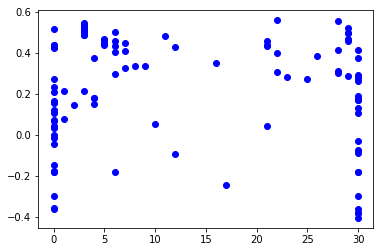

In [28]:
#PVMPGDM1 Index
plt.plot(PVMPGDM1_Index_lags,PVMPGDM1_Index_corr,'bo');

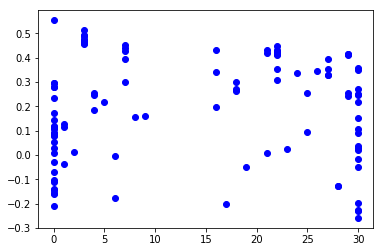

In [30]:
#PVMPGDM2 Index
plt.plot(PVMPGDM1_Index_lags,PVMPGDM1_Index_corr,'bo');

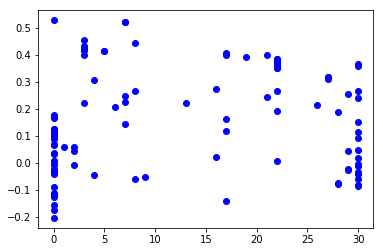

In [32]:
#PVMPGDM3 Index
plt.plot(PVMPGDM1_Index_lags,PVMPGDM1_Index_corr,'bo');

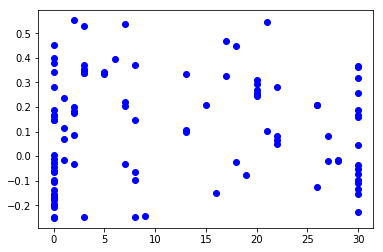

In [34]:
#PVMPGDM4 Index
plt.plot(PVMPGDM1_Index_lags,PVMPGDM1_Index_corr,'bo');

In [35]:
import plotly.plotly as py
import plotly.graph_objs as go

In [37]:
trace = go.Scatter(
    x = PVMPGDM1_Index_lags,
    y = PVMPGDM1_Index_corr,
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data,)

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.